In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc_absolute
%store -r Y_relative_footsteps_acc_absolute
print(X_relative_footsteps_acc_absolute.shape)
print(Y_relative_footsteps_acc_absolute.shape)

(4250, 28)
(4250, 4)


In [14]:
min(Y_relative_footsteps_acc_absolute[:, 0])

-0.03170367838202992

In [16]:
max(Y_relative_footsteps_acc_absolute[:, 0])

0.14838966959598565

# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [7]:
## Entries where FL is swinging
idxs = np.where(X_relative_footsteps_acc_absolute[:, 21] == 1)[0]
X_relative_footsteps_acc_absolute_FL_swinging = X_relative_footsteps_acc_absolute[idxs]
Y_relative_footsteps_acc_absolute_FL_swinging = Y_relative_footsteps_acc_absolute[idxs]

In [8]:
len(idxs)

2139

## Predict FL foot -> x

### Linear Regression

In [9]:
# Input
X = np.hstack((X_relative_footsteps_acc_absolute_FL_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_absolute_FL_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_absolute_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)
    
# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9986741535619139
RMSE:  0.0012899676412564233
The lowest error is:  2.1298909551742407e-06
The highest error is:  0.007298315014643161
The avg. error is:  0.0007881547142514276


In [10]:
model_fl_relative_support_x.coef_

array([[-1.97089507e-04, -8.32667268e-17,  0.00000000e+00,
         2.14090231e-01,  1.66533454e-16,  0.00000000e+00,
        -2.28092829e-01,  4.47825286e-01,  4.01903150e-02,
        -1.24857686e-01,  1.32036813e-01, -1.28547580e-01,
        -5.79170699e-02, -4.01065967e-01]])

In [11]:
model_fl_relative_support_x.intercept_

array([-0.0868816])

Text(0, 0.5, 'Predictions')

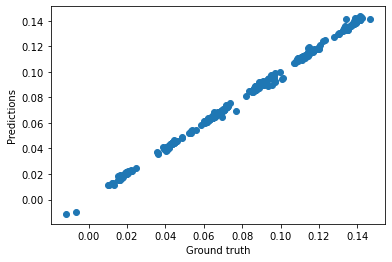

In [12]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_fl_relative_support_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_fl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_x.sav")

### Predict FL foot -> y

In [22]:
# Input
X = np.hstack((X_relative_footsteps_acc_absolute_FL_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_absolute_FL_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_absolute_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8782725061789025
RMSE:  0.0010573420839621078
The lowest error is:  3.0301090920246965e-06
The highest error is:  0.009725120032681497
The avg. error is:  0.0007006568632456616


In [23]:
model_fl_relative_support_y.coef_

array([[ 3.50666832e-03, -4.34550602e-15, -6.93889390e-18,
        -2.22044605e-16, -2.19410988e-01,  2.19412168e-01,
         1.98016820e-01, -5.38700784e-02, -1.32835609e-01,
         3.08388583e-01, -8.54277053e-02, -4.86459330e-02,
        -1.43837831e-01, -1.43512024e-01]])

In [24]:
model_fl_relative_support_y.intercept_

array([-0.02545843])

Text(0, 0.5, 'Predictions')

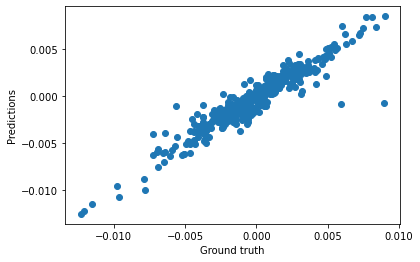

In [25]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [56]:
#%store model_fl_relative_support_y

In [43]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [44]:
# Save model
#joblib.dump(model_fl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_y.sav")